In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')


df = pd.read_csv('parkinson_done.csv')


X = df.drop(columns = ['status'])
y = df['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)


: 

In [38]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),RPDE,DFA,spread2,D2,status
0,119.992,157.302,74.997,0.00784,0.414783,0.815285,0.266482,2.301442,1
1,122.400,148.650,113.819,0.00968,0.458359,0.819521,0.335590,2.486855,1
2,116.682,131.111,111.555,0.01050,0.429895,0.825288,0.311173,2.342259,1
3,116.676,137.871,111.366,0.00997,0.434969,0.819235,0.334147,2.405554,1
4,116.014,141.781,110.655,0.01284,0.417356,0.823484,0.234513,2.332180,1
...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.448439,0.657899,0.121952,2.657476,0
191,209.516,253.017,89.488,0.00564,0.431674,0.683244,0.129303,2.784312,0
192,174.688,240.005,74.287,0.01360,0.407567,0.655683,0.158453,2.679772,0
193,198.764,396.961,74.904,0.00740,0.451221,0.643956,0.207454,2.138608,0


In [39]:
rf_model = RandomForestClassifier(n_estimators=124, max_depth=19, min_samples_split=2, min_samples_leaf=2, max_features='log2')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
# Tạo classification report
# report = classification_report(y_test, y_pred)
# # In report ra màn hình
# print("Classification Report for Random Forest:")
# print(report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.8717948717948718


In [40]:
# import joblib

# # Save the trained model
# joblib.dump(rf_model, 'parkinsons_randomforest_sklearn_model.pkl')

In [41]:
# # Hàm mục tiêu cho Optuna
# def objective(trial):
#     # Định nghĩa không gian tìm kiếm siêu tham số
#     n_estimators = trial.suggest_int('n_estimators', 10, 200)
#     max_depth = trial.suggest_int('max_depth', 3, 20)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

#     # Khởi tạo mô hình Random Forest với các siêu tham số
#     model = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         random_state=42
#     )

#     # Huấn luyện mô hình
#     model.fit(X_train, y_train)

#     # Dự đoán trên tập kiểm tra
#     y_pred = model.predict(X_train)

#     # Tính F1-score (trên tập kiểm tra)
#     f1 = f1_score(y_train, y_pred, average='macro')

#     return f1

# # Tạo study của Optuna để tối ưu hóa
# study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
# study.optimize(objective, n_trials=100)

# # Lấy bộ siêu tham số tốt nhất
# best_params = study.best_params
# print("Best Parameters:", best_params)

# # Khởi tạo và huấn luyện mô hình Random Forest với siêu tham số tốt nhất
# best_model = RandomForestClassifier(
#     n_estimators=best_params['n_estimators'],
#     max_depth=best_params['max_depth'],
#     min_samples_split=best_params['min_samples_split'],
#     min_samples_leaf=best_params['min_samples_leaf'],
#     max_features=best_params['max_features'],
#     random_state=42
# )
# best_model.fit(X_train, y_train)

# # Dự đoán trên tập kiểm tra
# y_pred = best_model.predict(X_test)

# # In báo cáo phân loại
# report = classification_report(y_test, y_pred)
# print("Random Forest Classification Report with Optuna:\n", report)


In [2]:
np.random.seed(42)
# Assuming the Node and DecisionTreeClassifier classes from the provided code are available
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
    
    def build_tree(self, dataset, curr_depth=0, feature_indices=None):
        X, y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        if feature_indices is None:
            feature_indices = list(range(num_features))
            
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, feature_indices)
            if best_split and best_split.get("info_gain", 0) > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1, feature_indices)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1, feature_indices)
                return Node(best_split["feature_index"], best_split["threshold"], 
                           left_subtree, right_subtree, best_split["info_gain"])
        
        leaf_value = self.calculate_leaf_value(y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, feature_indices):
        best_split = {}
        max_info_gain = -float("inf")
        
        for feature_index in feature_indices:
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode == "gini":
            gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
    
    def calculate_leaf_value(self, y):
        y = list(y)
        return max(y, key=y.count)
    
    def fit(self, dataset, feature_indices=None):
        self.root = self.build_tree(dataset, feature_indices=feature_indices)
    
    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, X, tree):
        if tree.value != None: return tree.value
        feature_val = X[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(X, tree.left)
        else:
            return self.make_prediction(X, tree.right)

class RandomForestClassifier:
    def __init__(self, n_estimators=100, min_samples_split=3, max_depth=3, max_features='sqrt'):
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
        
    def fit(self, X, y):
        self.trees = []
        n_features = X.shape[1]
        
        # Determine number of features to consider at each split
        if self.max_features == 'sqrt':
            n_features_split = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            n_features_split = int(np.log2(n_features))
        else:
            n_features_split = n_features
            
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            indices = np.random.choice(len(X), size=len(X), replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            
            # Random feature selection
            feature_indices = np.random.choice(n_features, size=n_features_split, replace=False)
            
            # Train decision tree
            tree = DecisionTreeClassifier(min_samples_split=self.min_samples_split, 
                                       max_depth=self.max_depth)
            y_sample = y_sample.reshape(-1, 1)
            dataset = np.concatenate((X_sample, y_sample), axis=1)
            tree.fit(dataset, feature_indices)
            self.trees.append(tree)
    
    def predict(self, X):
        # Get predictions from all trees
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        
        # Majority voting
        predictions = []
        for i in range(len(X)):
            # Get predictions for this sample across all trees
            sample_preds = tree_predictions[:, i]
            # Find most common prediction
            unique, counts = np.unique(sample_preds, return_counts=True)
            predictions.append(unique[np.argmax(counts)])
        
        return np.array(predictions)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# Train Random Forest
rf_scratch = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_depth=3)
rf_scratch.fit(X_train, y_train)

# Test the model
y_pred = rf_scratch.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.8717948717948718


In [1]:
import pandas as pd
df = pd.read_csv('../alzheimer_done.csv')
df = df[:][:10]

In [2]:
df

,MemoryComplaints,BehavioralProblems,ADL,MMSE,FunctionalAssessment,Disorientation,PersonalityChanges,Smoking,HeadInjury,CholesterolTotal,Diagnosis
0,0,0,1.725883,21.463532,6.518877,0,0,0,0,242.366840,0
1,0,0,2.592424,20.613267,7.118696,0,0,0,0,231.162595,0
2,0,0,7.119548,7.356249,5.895077,1,0,0,0,284.181858,0
3,0,1,6.481226,13.991127,8.965106,0,0,1,0,159.582240,0
4,0,0,0.014691,13.517609,6.045039,0,1,0,0,237.602184,0
5,0,0,9.015686,27.517529,5.510144,0,0,0,0,280.712539,0
6,0,0,9.236328,1.964413,6.062124,0,0,1,1,263.734149,0
7,0,0,4.517248,10.139568,3.401374,0,0,0,0,151.383137,1
8,0,1,0.756232,25.820732,7.396061,0,1,0,0,233.605755,0
9,0,1,4.554394,28.388409,1.148904,0,0,1,0,281.630050,0


In [3]:
df.columns

Index(['MemoryComplaints', 'BehavioralProblems', 'ADL', 'MMSE',
       'FunctionalAssessment', 'Disorientation', 'PersonalityChanges',
       'Smoking', 'HeadInjury', 'CholesterolTotal', 'Diagnosis'],
      dtype='object')

0    278
1    152
Name: Diagnosis, dtype: int64
Accuracy scratch: 0.9511627906976744
Accuracy library: 0.9488372093023256


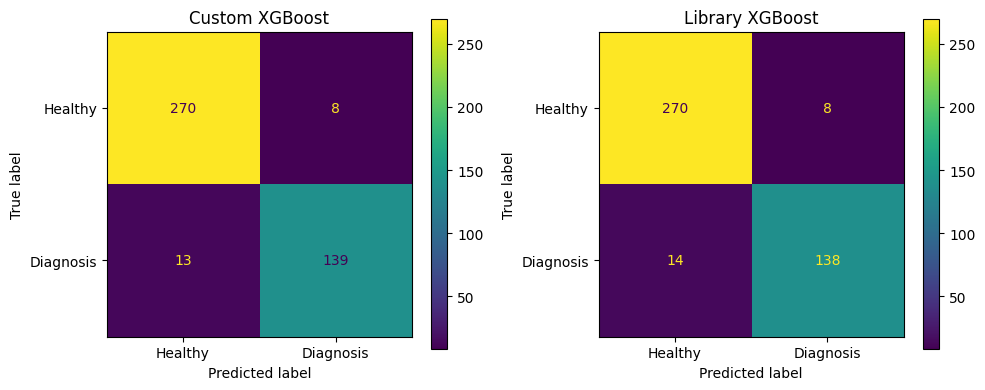

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

import numpy as np
from sklearn.datasets import make_classification

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_gradients(y_true, y_pred):
    p = sigmoid(y_pred)
    grad = p - y_true
    hess = p * (1 - p)
    return grad, hess

def calc_leaf_value(g, h, lam, alpha):
    G = np.sum(g)
    H = np.sum(h)
    if G > alpha:
        return - (G - alpha) / (H + lam)
    elif G < -alpha:
        return - (G + alpha) / (H + lam)
    else:
        return 0.0

class TreeNode:
    def __init__(self, depth=0, max_depth=3):
        self.left = None
        self.right = None
        self.feature_index = None
        self.threshold = None
        self.value = None  # chỉ dùng khi là leaf
        self.depth = depth
        self.max_depth = max_depth

def build_tree(X, g, h, depth, max_depth, lam, gamma, alpha):
    node = TreeNode(depth=depth, max_depth=max_depth)

    if depth >= max_depth or X.shape[0] <= 1:
        node.value = calc_leaf_value(g, h, lam, alpha)
        return node

    best_gain = -np.inf
    best_split = None

    for feature_index in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_index])
        for t in thresholds:
            left_idx = X[:, feature_index] <= t
            right_idx = ~left_idx

            if np.sum(left_idx) == 0 or np.sum(right_idx) == 0:
                continue

            GL, HL = np.sum(g[left_idx]), np.sum(h[left_idx])
            GR, HR = np.sum(g[right_idx]), np.sum(h[right_idx])

            gain = 0.5 * (GL**2 / (HL + lam) + GR**2 / (HR + lam) - (GL + GR)**2 / (HL + HR + lam)) - gamma

            if gain > best_gain:
                best_gain = gain
                best_split = (feature_index, t, left_idx, right_idx)

    if best_gain <= 0 or best_split is None:
        node.value = calc_leaf_value(g, h, lam, alpha)
        return node

    f_idx, t, left_idx, right_idx = best_split
    node.feature_index = f_idx
    node.threshold = t
    node.left = build_tree(X[left_idx], g[left_idx], h[left_idx], depth + 1, max_depth, lam, gamma, alpha)
    node.right = build_tree(X[right_idx], g[right_idx], h[right_idx], depth + 1, max_depth, lam, gamma, alpha)
    return node

def predict_tree(x, node):
    if node.value is not None:
        return node.value
    if x[node.feature_index] <= node.threshold:
        return predict_tree(x, node.left)
    else:
        return predict_tree(x, node.right)
    
class XGBoostClassifier:
    def __init__(self, n_estimators=10, max_depth=9, learning_rate=0.16730402817820244, lam=1.3289448722869181e-05, gamma=3.540362888980227, alpha=6.598711072054068): # Get From find_best_params
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.lr = learning_rate
        self.lam = lam
        self.gamma = gamma
        self.trees = []
        self.alpha = alpha

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)

        for _ in range(self.n_estimators):
            g, h = compute_gradients(y, y_pred)
            tree = build_tree(X, g, h, 0, self.max_depth, self.lam, self.gamma, self.alpha)
            self.trees.append(tree)

            update = np.array([predict_tree(x, tree) for x in X])
            y_pred += self.lr * update

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.lr * np.array([predict_tree(x, tree) for x in X])
        return (sigmoid(y_pred) > 0.5).astype(int)

    def predict_proba(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.lr * np.array([predict_tree(x, tree) for x in X])
        prob = sigmoid(y_pred)
        return np.vstack([1 - prob, prob]).T

df = pd.read_csv('../alzheimer_done.csv')

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print(y_test.value_counts())


my_xgb = XGBoostClassifier(n_estimators=10, max_depth=9, learning_rate=0.16730402817820244, lam=1.3289448722869181e-05, gamma=3.540362888980227, alpha=6.598711072054068)
my_xgb.fit(X_train, y_train)
y_pred_my = my_xgb.predict(X_test)


lib_model = XGBClassifier(n_estimators=10, max_depth=9, learning_rate=0.16730402817820244, reg_lambda=1.3289448722869181e-05, gamma=3.540362888980227, reg_alpha=6.598711072054068)

lib_model.fit(X_train, y_train)
y_pred_lib = lib_model.predict(X_test)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

cm1 = confusion_matrix(y_test, y_pred_my)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Healthy", "Diagnosis"])
disp1.plot(ax=axs[0], values_format=".0f")
print("Accuracy scratch:", accuracy_score(y_test, y_pred_my))

cm2 = confusion_matrix(y_test, y_pred_lib)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Healthy", "Diagnosis"])
disp2.plot(ax=axs[1], values_format=".0f")
print("Accuracy library:", accuracy_score(y_test, y_pred_lib))

axs[0].set_title("Custom XGBoost")
axs[1].set_title("Library XGBoost")

plt.tight_layout()
plt.show()

In [9]:
import joblib
joblib.dump(lib_model, "../model/xgboost_lib.pkl")
joblib.dump(lib_model, "../model/xgboost_scr.pkl")

lib_model = joblib.load("../model/xgboost_lib.pkl")
my_xgb = joblib.load("../model/xgboost_scr.pkl")

In [10]:
# Dự đoán thử sau khi load
y_pred_my_loaded = my_xgb.predict(X_test)
y_pred_lib_loaded = lib_model.predict(X_test)  # nếu đã load lại bằng joblib

print("Accuracy custom (loaded):", accuracy_score(y_test, y_pred_my_loaded))
print("Accuracy lib (loaded):", accuracy_score(y_test, y_pred_lib_loaded))


Accuracy custom (loaded): 0.9488372093023256
Accuracy lib (loaded): 0.9488372093023256


In [20]:
X_test[:4]

array([[-0.51247653, -0.4312567 , -1.00655759, -0.09267445, -1.31610283,
        -0.43353102, -0.42134813,  1.57039136, -0.31945466, -0.47438562],
       [-0.51247653, -0.4312567 , -0.61445513, -1.15695364,  0.92221572,
        -0.43353102, -0.42134813, -0.63678394, -0.31945466,  0.51521421],
       [ 1.95130886, -0.4312567 ,  0.04518487,  0.25189939, -1.41742693,
        -0.43353102, -0.42134813, -0.63678394, -0.31945466, -1.25054066],
       [-0.51247653, -0.4312567 , -1.18678664,  1.06304969, -0.50822227,
         2.30664003, -0.42134813, -0.63678394, -0.31945466,  1.29736732]])

In [22]:
print(lib_model.n_features_in_)


10


In [24]:
joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

In [25]:
X

,MemoryComplaints,BehavioralProblems,ADL,MMSE,FunctionalAssessment,Disorientation,PersonalityChanges,Smoking,HeadInjury,CholesterolTotal
0,0,0,1.725883,21.463532,6.518877,0,0,0,0,242.366840
1,0,0,2.592424,20.613267,7.118696,0,0,0,0,231.162595
2,0,0,7.119548,7.356249,5.895077,1,0,0,0,284.181858
3,0,1,6.481226,13.991127,8.965106,0,0,1,0,159.582240
4,0,0,0.014691,13.517609,6.045039,0,1,0,0,237.602184
...,...,...,...,...,...,...,...,...,...,...
2144,0,0,4.492838,1.201190,0.238667,0,0,0,0,280.476824
2145,0,1,9.204952,6.458060,8.687480,0,0,0,0,186.384436
2146,0,0,5.036334,17.011003,1.972137,0,0,0,0,237.024558
2147,0,0,3.785399,4.030491,5.173891,0,0,0,0,242.197192


In [26]:
hihi = joblib.load('../model/random_forest_lib.pkl')
print(hihi.n_features_in_)


10


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, f1_score
pd.set_option('display.max_columns', None)
import joblib
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')


df = pd.read_csv('../alzheimer_done.csv')

X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)


In [28]:
rf_model_entropy = RandomForestClassifier(n_estimators=124, max_depth=19, min_samples_split=2, min_samples_leaf=2, max_features='log2', criterion='entropy')
rf_model_entropy.fit(X_train, y_train)
y_pred_entropy = rf_model_entropy.predict(X_test)

rf_model_gini = RandomForestClassifier(n_estimators=124, max_depth=19, min_samples_split=2, min_samples_leaf=2, max_features='log2', criterion='entropy')
rf_model_gini.fit(X_train, y_train)
y_pred_gini = rf_model_gini.predict(X_test)
# Tạo classification report
# report = classification_report(y_test, y_pred)
# # In report ra màn hình
# print("Classification Report for Random Forest:")
# print(report)
acc_skl_entropy = accuracy_score(y_test, y_pred_entropy)
acc_skl_gini = accuracy_score(y_test, y_pred_gini)
print(f"Random Forest Accuracy Entropy: {acc_skl_entropy}")
print(f"Random Forest Accuracy Gini: {acc_skl_gini}")

Random Forest Accuracy Entropy: 0.9674418604651163
Random Forest Accuracy Gini: 0.9651162790697675


In [30]:
joblib.dump(rf_model_entropy, '../model/random_forest_scr.pkl')

['../model/random_forest_scr.pkl']

In [2]:
import pandas as pd
df = pd.read_csv('../alzheimer_done.csv')
df.head()

,MemoryComplaints,BehavioralProblems,ADL,MMSE,FunctionalAssessment,Disorientation,PersonalityChanges,Smoking,HeadInjury,CholesterolTotal,Diagnosis
0,0,0,1.725883,21.463532,6.518877,0,0,0,0,242.366840,0
1,0,0,2.592424,20.613267,7.118696,0,0,0,0,231.162595,0
2,0,0,7.119548,7.356249,5.895077,1,0,0,0,284.181858,0
3,0,1,6.481226,13.991127,8.965106,0,0,1,0,159.582240,0
4,0,0,0.014691,13.517609,6.045039,0,1,0,0,237.602184,0


In [19]:
liki = df.drop(['Diagnosis'],axis=1)
liki = liki[:10]
liki

,MemoryComplaints,BehavioralProblems,ADL,MMSE,FunctionalAssessment,Disorientation,PersonalityChanges,Smoking,HeadInjury,CholesterolTotal
0,0,0,1.725883,21.463532,6.518877,0,0,0,0,242.366840
1,0,0,2.592424,20.613267,7.118696,0,0,0,0,231.162595
2,0,0,7.119548,7.356249,5.895077,1,0,0,0,284.181858
3,0,1,6.481226,13.991127,8.965106,0,0,1,0,159.582240
4,0,0,0.014691,13.517609,6.045039,0,1,0,0,237.602184
5,0,0,9.015686,27.517529,5.510144,0,0,0,0,280.712539
6,0,0,9.236328,1.964413,6.062124,0,0,1,1,263.734149
7,0,0,4.517248,10.139568,3.401374,0,0,0,0,151.383137
8,0,1,0.756232,25.820732,7.396061,0,1,0,0,233.605755
9,0,1,4.554394,28.388409,1.148904,0,0,1,0,281.630050


In [23]:
liki.to_csv('../test.csv',index=False)

In [24]:
len(liki.columns)

10

In [26]:
liki = liki[1:]

In [27]:
liki

,MemoryComplaints,BehavioralProblems,ADL,MMSE,FunctionalAssessment,Disorientation,PersonalityChanges,Smoking,HeadInjury,CholesterolTotal
1,0,0,2.592424,20.613267,7.118696,0,0,0,0,231.162595
2,0,0,7.119548,7.356249,5.895077,1,0,0,0,284.181858
3,0,1,6.481226,13.991127,8.965106,0,0,1,0,159.582240
4,0,0,0.014691,13.517609,6.045039,0,1,0,0,237.602184
5,0,0,9.015686,27.517529,5.510144,0,0,0,0,280.712539
6,0,0,9.236328,1.964413,6.062124,0,0,1,1,263.734149
7,0,0,4.517248,10.139568,3.401374,0,0,0,0,151.383137
8,0,1,0.756232,25.820732,7.396061,0,1,0,0,233.605755
9,0,1,4.554394,28.388409,1.148904,0,0,1,0,281.630050
